In [1]:
import numpy as np
import pandas
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from PIL import Image
from scipy import ndimage
from skimage import measure

In [2]:
dataf = pandas.read_csv(r'letter-recognition-new.csv')

In [3]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   letter  312 non-null    object 
 1   xbox    312 non-null    float64
 2   ybox    312 non-null    float64
 3   width   312 non-null    int64  
 4   height  312 non-null    int64  
 5   onpix   312 non-null    int64  
 6   xbar    312 non-null    float64
 7   ybar    312 non-null    float64
 8   x2bar   312 non-null    float64
 9   y2bar   312 non-null    float64
 10  xybar   312 non-null    float64
 11  x2ybar  312 non-null    float64
 12  xy2bar  312 non-null    float64
 13  xedge   312 non-null    float64
 14  xedgey  312 non-null    int64  
 15  yedge   312 non-null    float64
 16  yedgex  312 non-null    int64  
dtypes: float64(11), int64(5), object(1)
memory usage: 41.6+ KB


In [4]:
dataf.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,20.750000,22.149038,27.788462,34.483974,485.157051,-0.020730,-0.008531,60.103102,100.375684,0.423682,-43.638966,-32.887206,4.869618,3051.182692,3.205217,2619.051282
std,2.331112,0.830139,6.563085,3.604178,138.835827,0.056574,0.048748,28.446070,25.612768,7.129068,197.048928,136.895234,1.463951,1039.218465,1.120862,946.159272
min,12.000000,19.500000,7.000000,27.000000,128.000000,-0.224888,-0.146223,3.468750,49.331395,-19.282680,-732.449438,-468.427609,2.529412,952.000000,0.378378,299.000000
25%,19.500000,21.500000,24.000000,32.000000,389.750000,-0.047874,-0.021886,40.314128,83.568979,-0.863486,-91.360387,-83.378854,3.990741,2299.250000,2.314286,1869.500000
50%,21.000000,22.000000,28.000000,35.000000,475.000000,-0.003986,0.000309,56.228209,100.181803,0.460113,4.210870,-8.438834,4.616796,2911.500000,3.270284,2551.000000
75%,22.500000,22.500000,31.000000,37.000000,578.750000,0.004028,0.010299,80.223598,116.123431,3.083972,34.526696,18.817971,5.474856,3624.250000,4.054826,3353.750000
max,26.500000,25.000000,44.000000,44.000000,850.000000,0.189990,0.142777,143.595985,169.991228,27.208741,610.756607,371.697751,14.857143,7972.000000,5.828571,5052.000000


In [5]:
y = dataf.pop('letter')

In [6]:
def norm(df):
    norm_df = df.copy()
    columns_to_normalize = df.columns

    for column in columns_to_normalize:
        min_val = norm_df[column].min()
        max_val = norm_df[column].max()
    
        norm_df[column] = (norm_df[column] - min_val) / (max_val - min_val)
    return norm_df

In [7]:
dataf_norm = norm(dataf)

<function matplotlib.pyplot.show(close=None, block=None)>

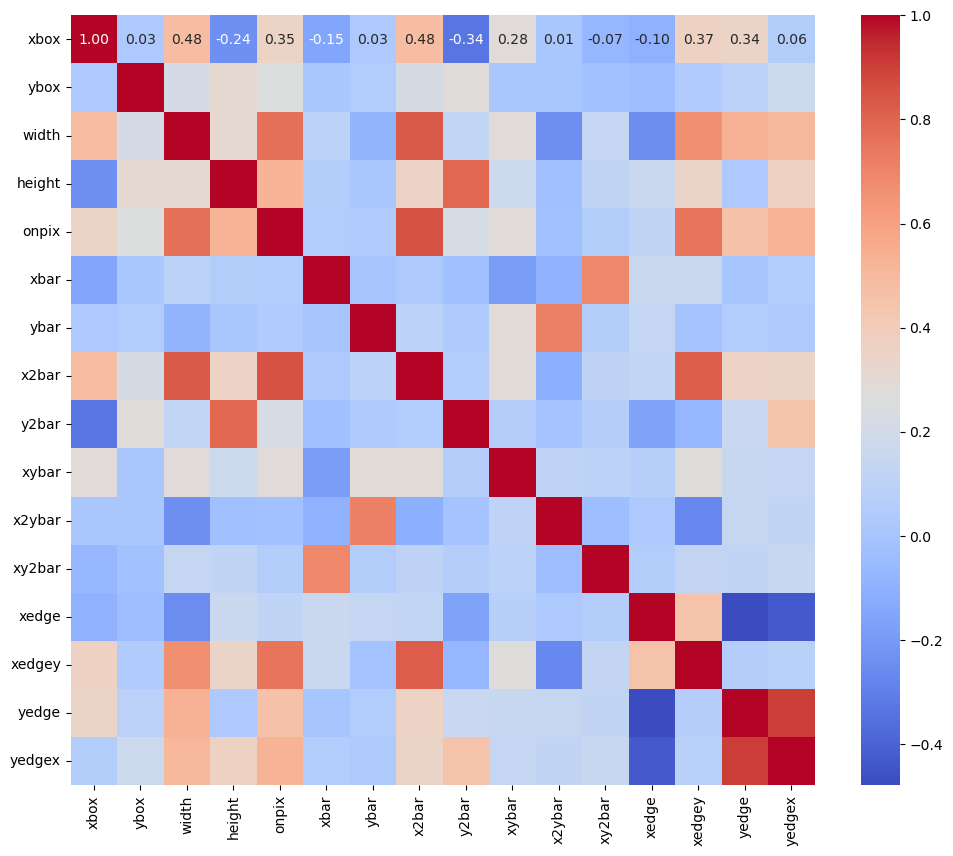

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(dataf_norm.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.show

In [9]:
x_train,x_test,y_train,y_test=train_test_split(dataf_norm,y,test_size=0.15)

In [10]:
from sklearn.neighbors import KNeighborsClassifier


knn_lib=KNeighborsClassifier(3)
knn_lib.fit(x_train, y_train)
knn_lib.score(x_test, y_test)

0.5957446808510638